In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('jobs.csv')

In [3]:
# Simple statistics retrieved from the CSV file

import pandas as pd

# Load the CSV file
df = pd.read_csv('jobs.csv')

# Assuming 'Salary' is a column with numerical values
# If 'Salary' contains non-numerical values or symbols, they should be cleaned or converted to numerical values first

# Calculate statistics
mean_salary = df['Salary'].mean()
median_salary = df['Salary'].median()
std_dev_salary = df['Salary'].std()
min_salary = df['Salary'].min()
max_salary = df['Salary'].max()

# Display the results
print("Salary Statistics:")
print(f"Mean: {mean_salary}")
print(f"Median: {median_salary}")
print(f"Standard Deviation: {std_dev_salary}")
print(f"Minimum: {min_salary}")
print(f"Maximum: {max_salary}")

# If you need more statistics, you can add them here using similar methods


Salary Statistics:
Mean: 27.360367762128327
Median: 21.5
Standard Deviation: 15.885060048807812
Minimum: 15.5
Maximum: 250.0


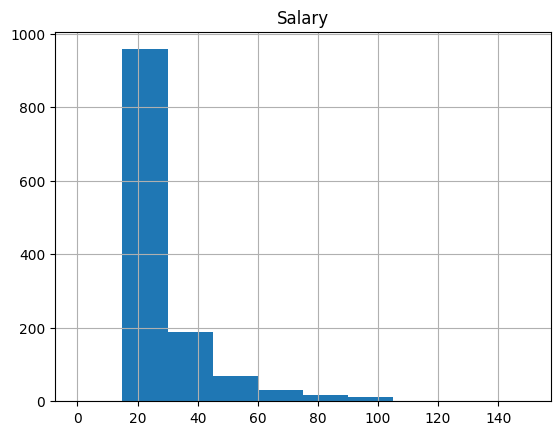

In [2]:
# Salary histogram
df.hist(range=(0, 150))
plt.show()





df = pd.read_csv('jobs.csv')

locations = set()

print(df['Location'])

In [23]:
import pandas as pd

df = pd.read_csv('jobs.csv')

locations: [str] = df['Location'].to_list()

for loc in locations:
    if 'san francisco' in str(loc).lower():
        print(loc)

79 New Montgomery, San Francisco, CA 94105
San Francisco, CA
FXG Management in San Francisco, CA 94114
San Francisco, CA
San Francisco, CA 94125
San Francisco, CA 94102
500 Parnassus Ave, San Francisco, CA 94143
San Francisco, CA 94105
San Francisco, CA
814 Mission Street, San Francisco, CA 94103
181 Fremont St, San Francisco, CA 94105
San Francisco, CA
San Francisco, CA 94117
San Francisco, CA
200 Paul Avenue, San Francisco, CA 94124
San Francisco, CA
345 Stockton Street, San Francisco, CA 94108
San Francisco, CA
Caresoft Inc in San Francisco, CA 94105
San Francisco, CA
San Francisco, CA
South San Francisco, CA
San Francisco, CA
South San Francisco, CA 94080
San Francisco, CA
185 Clara Street, San Francisco, CA 94107
San Francisco, CA 94124
320 Shaw Rd, South San Francisco, CA 94080
San Francisco, CA
San Francisco Bay Area, CA
San Francisco, CA


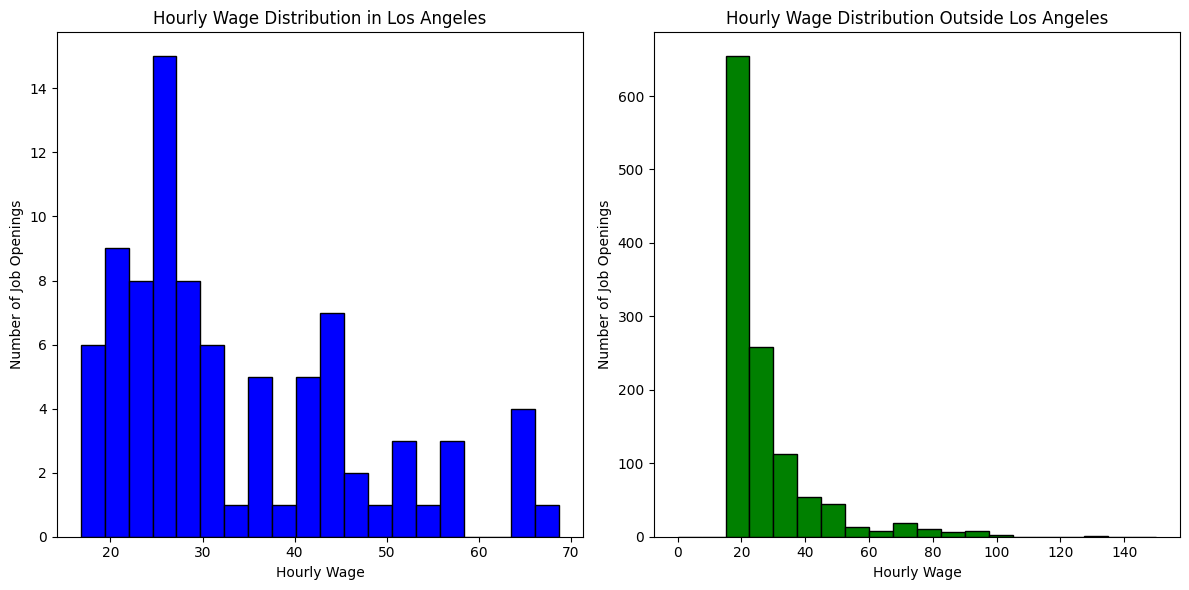

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('jobs.csv')

# Define the criterion for filtering jobs in LA - update this according to your data
la_criterion = df['Location'].str.contains('Los Angeles', case=False, na=False)

# Segment the data into two DataFrames
la_jobs = df[la_criterion]
non_la_jobs = df[~la_criterion]

# Plotting
plt.figure(figsize=(12, 6))

# Plot for LA
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(la_jobs['Salary'], bins=20, color='blue', edgecolor='black')
plt.title('Hourly Wage Distribution in Los Angeles')
plt.xlabel('Hourly Wage')
plt.ylabel('Number of Job Openings')

# Plot for outside LA
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(non_la_jobs['Salary'], bins=20, color='green', edgecolor='black', range=(0, 150))
plt.title('Hourly Wage Distribution Outside Los Angeles')
plt.xlabel('Hourly Wage')
plt.ylabel('Number of Job Openings')

plt.tight_layout()
plt.show()


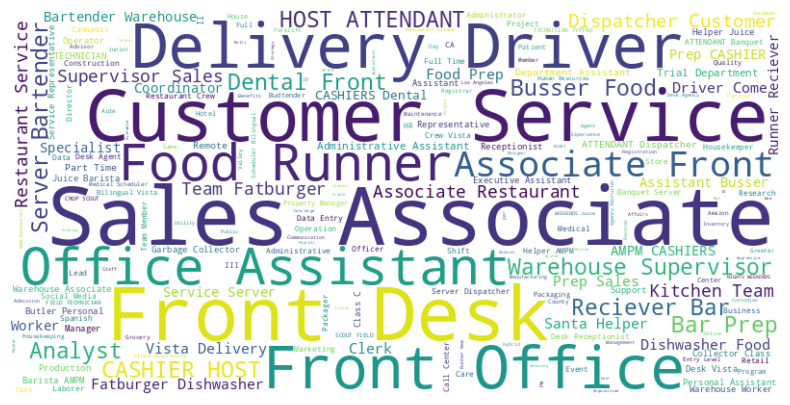

In [14]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('jobs.csv')

# Combine all job titles into a single string
all_titles = ' '.join(df['Title'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_titles)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


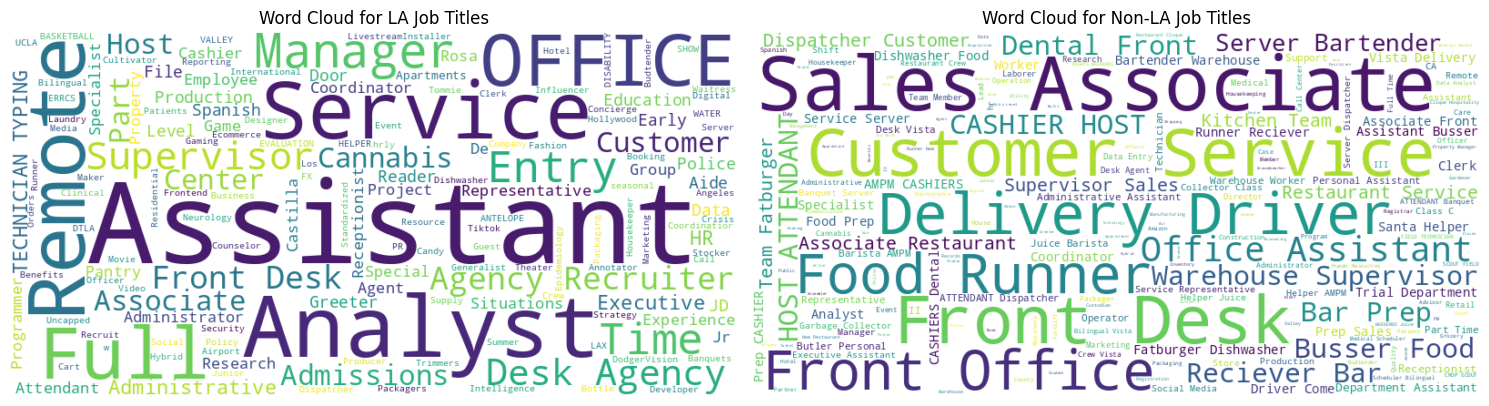

In [15]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('jobs.csv')

# Define the criterion for filtering jobs in LA - update this according to your data
la_criterion = df['Location'].str.contains('Los Angeles', case=False, na=False)

# Segment the data into two DataFrames
la_jobs = df[la_criterion]
non_la_jobs = df[~la_criterion]

# Combine job titles into single strings for each segment
la_titles = ' '.join(la_jobs['Title'])
non_la_titles = ' '.join(non_la_jobs['Title'])

# Create word clouds
wordcloud_la = WordCloud(width=800, height=400, background_color='white').generate(la_titles)
wordcloud_non_la = WordCloud(width=800, height=400, background_color='white').generate(non_la_titles)

# Plotting
plt.figure(figsize=(15, 7))

# Word cloud for LA
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(wordcloud_la, interpolation='bilinear')
plt.title('Word Cloud for LA Job Titles')
plt.axis('off')

# Word cloud for outside LA
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(wordcloud_non_la, interpolation='bilinear')
plt.title('Word Cloud for Non-LA Job Titles')
plt.axis('off')

plt.tight_layout()
plt.show()


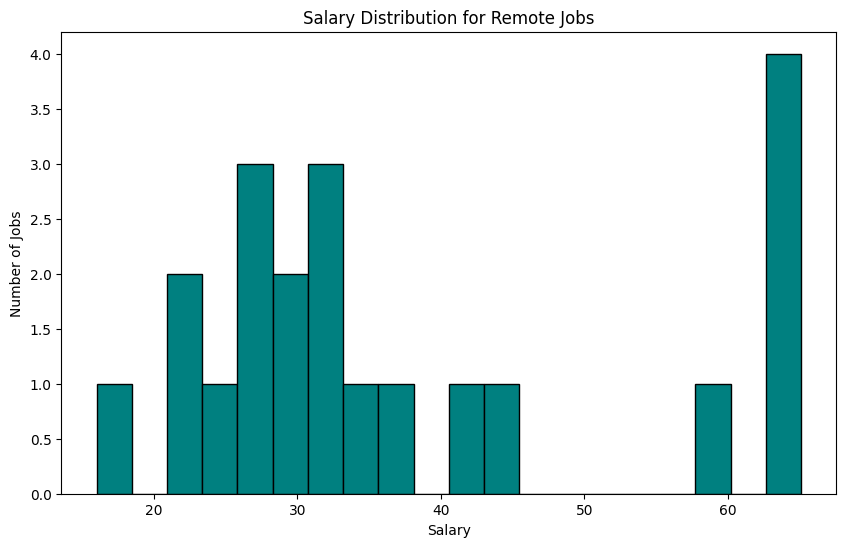

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('jobs.csv')

# Filter job titles for remote jobs
# Adjust keywords as needed for your dataset
remote_keywords = ['remote', 'virtual', 'telecommute']
remote_condition = df['Title'].str.contains('|'.join(remote_keywords), case=False, na=False)
remote_jobs = df[remote_condition]

# Plotting the salary for remote jobs
plt.figure(figsize=(10, 6))
plt.hist(remote_jobs['Salary'], bins=20, color='teal', edgecolor='black')
plt.title('Salary Distribution for Remote Jobs')
plt.xlabel('Salary')
plt.ylabel('Number of Jobs')
plt.show()


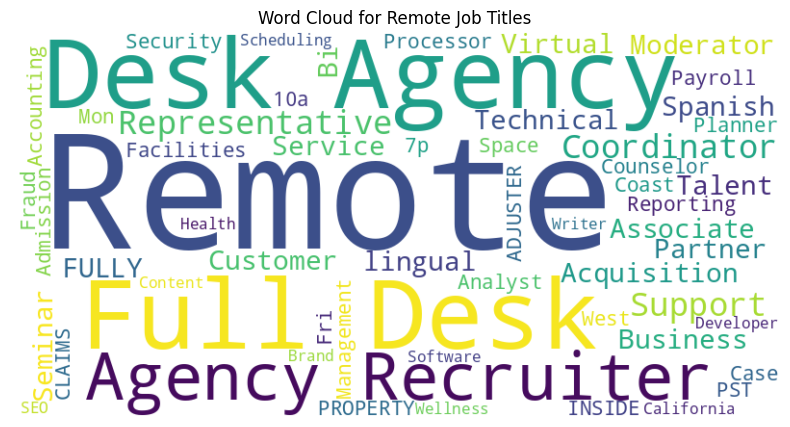

In [20]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('jobs.csv')

# Filter job titles for remote jobs using keywords
remote_keywords = ['remote', 'virtual', 'telecommute']
remote_condition = df['Title'].str.contains('|'.join(remote_keywords), case=False, na=False)
remote_jobs_titles = df[remote_condition]['Title']

# Combine all remote job titles into a single string
all_remote_titles = ' '.join(remote_jobs_titles)

# Create a word cloud for remote job titles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_remote_titles)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Remote Job Titles')
plt.axis('off')
plt.show()


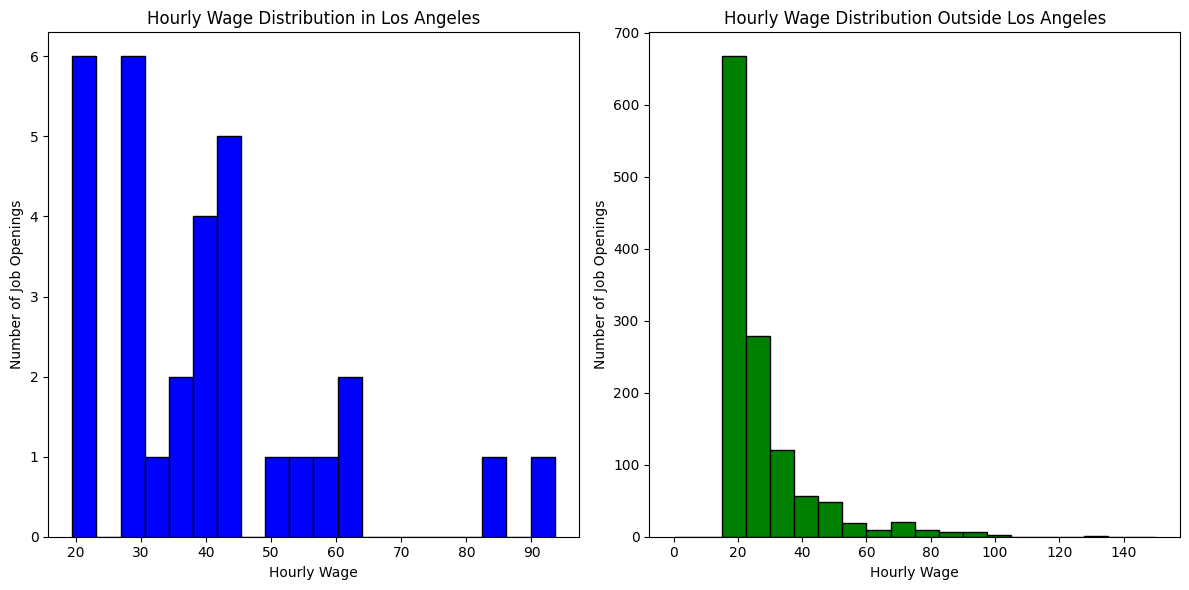

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('jobs.csv')

# Define the criterion for filtering jobs in LA - update this according to your data
la_criterion = df['Location'].str.contains('San Francisco', case=False, na=False)

# Segment the data into two DataFrames
la_jobs = df[la_criterion]
non_la_jobs = df[~la_criterion]

# Plotting
plt.figure(figsize=(12, 6))

# Plot for LA
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(la_jobs['Salary'], bins=20, color='blue', edgecolor='black')
plt.title('Hourly Wage Distribution in Los Angeles')
plt.xlabel('Hourly Wage')
plt.ylabel('Number of Job Openings')

# Plot for outside LA
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(non_la_jobs['Salary'], bins=20, color='green', edgecolor='black', range=(0, 150))
plt.title('Hourly Wage Distribution Outside Los Angeles')
plt.xlabel('Hourly Wage')
plt.ylabel('Number of Job Openings')

plt.tight_layout()
plt.show()


In [48]:
import pandas as pd
from scipy import stats

# Load the dataset
df = pd.read_csv('jobs.csv')

# Calculate the Z-scores of the Salary column
df['Z_Score'] = stats.zscore(df['Salary'])

# Define the threshold
threshold = 3

# Identify outliers
outliers = df[(df['Z_Score'] > threshold) | (df['Z_Score'] < -threshold)]

with open('outliers.txt', 'w') as f:
    f.write(outliers.to_csv())
print(len(outliers))


30
